In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=6157eae6b25439739b2ceafd1dfd0ec521ef59722682dca3df2b410599cf0e80
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=efa07251155750aa11aa9d8535dc756c92f43ee953f291539444e5cc704b2950
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
metadata = pd.read_csv('interesting_metadata_for_gbm_vs_normal.csv')
metadata = metadata[["Unnamed: 0", "tumor"]]
metadata.rename(columns={'Unnamed: 0':'sample_name'}, inplace=True)
metadata = metadata.set_index('sample_name', drop=False).rename_axis(None)
metadata = metadata.iloc[: , 1:]
metadata

,tumor
GSM2899326,GBM
GSM2899327,GBM
GSM2899328,GBM
GSM2899329,GBM
GSM2899330,GBM
...,...
GSM97966,GBM
GSM97967,GBM
GSM97968,GBM
GSM97969,GBM


In [ ]:
metadata["tumor"].value_counts()

GBM       305
normal     51
Name: tumor, dtype: int64

In [ ]:
df = pd.read_csv('interesting_genes_expressions_for_gbm_vs_normal.csv')
df = df.drop(columns={'Unnamed: 0'})
df_transposed = df.T
df_transposed = df_transposed.rename(columns=df_transposed.iloc[356])
df_transposed.drop(index=df_transposed.index[356], 
        axis=0, 
        inplace=True)
frames = [metadata, df_transposed]
df = pd.concat(frames, axis=1)
df
df_transposed

,SCIN,NAV3,CREG2,RXFP1,RBFOX1,NaN,DNAJA4,RGS7,OLFM3,OLFM3,...,GABRA1,HTR2A,RAB3C,NEXMIF,KCNQ5,GLRB,NEFH,PHF24,PPP1R16B,SHISAL1
GSM2899326,5.893106,5.887953,6.213507,4.865254,7.32657,9.008307,4.715704,5.087414,4.835617,4.469334,...,5.509101,4.812886,5.064933,4.752345,6.059171,6.303443,5.434206,5.486401,5.912689,5.989639
GSM2899327,8.553394,7.469058,6.332858,4.764392,8.291405,9.526303,4.513829,5.618441,5.896084,5.057019,...,5.646714,5.318297,7.30993,8.797541,6.215755,6.419077,6.627994,5.997405,8.399034,6.452865
GSM2899328,5.059928,9.497947,8.135498,6.450205,10.827845,12.73428,7.873798,8.75332,8.765583,8.3027,...,9.972019,9.435788,8.011967,9.694102,9.148566,9.276816,9.520928,9.158793,10.455272,9.287224
GSM2899329,6.690789,7.050517,5.909533,4.746026,7.079067,9.418886,5.084166,5.705095,5.129715,4.392884,...,5.434321,5.006544,5.086214,7.569148,5.214896,6.346889,5.707429,5.932495,6.263655,6.099967
GSM2899330,9.487291,8.944802,5.741844,4.782784,7.313938,9.126035,5.022255,4.948203,4.933111,4.411387,...,5.629636,5.079386,4.733561,7.920996,5.900008,5.97748,5.728552,5.774954,6.306956,5.71853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM97966,7.123493,5.596523,6.119224,4.501668,7.036426,9.523712,4.48166,5.484426,5.042516,4.671264,...,5.910175,4.737608,4.842652,4.717706,5.237441,6.001462,5.253549,5.936955,6.003382,5.890101
GSM97967,5.865979,9.070803,9.563284,6.810594,11.257569,12.739674,6.694831,8.98073,8.998477,8.715855,...,10.606814,8.97819,7.684696,9.149663,9.907065,9.328058,10.170445,9.329689,10.543375,9.092771
GSM97968,6.80024,9.045504,8.874923,6.210138,10.361614,12.341219,5.599934,7.426404,7.753735,6.625531,...,8.860256,7.061934,6.565887,8.540664,8.809902,8.351021,8.692934,7.941307,10.051136,8.190855
GSM97969,8.91809,7.227983,6.254368,4.664544,7.507163,9.886079,4.357976,5.537988,5.624085,4.759282,...,6.158538,4.728239,5.348897,4.888749,5.337169,6.683646,5.689071,5.838098,7.006535,6.610275


In [ ]:
df.isnull().sum()

tumor       0
SCIN        0
NAV3        0
CREG2       0
RXFP1       0
           ..
GLRB        0
NEFH        0
PHF24       0
PPP1R16B    0
SHISAL1     0
Length: 764, dtype: int64

In [ ]:
print('Missing values: ',sum(df.isnull().sum()))

Missing values:  0


In [ ]:
# Encoding categorical values

df['tumor'] = df['tumor'].replace({'normal':0,'GBM':1,'Other':-1}).astype(np.uint8)

In [ ]:
# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',51/(51+305))
print('Null Accuracy: ',305/(305+51))

Inverse of Null Accuracy:  0.14325842696629212
Null Accuracy:  0.8567415730337079


In [ ]:
df.reset_index(inplace=True)
df

,index,tumor,SCIN,NAV3,CREG2,RXFP1,RBFOX1,NaN,DNAJA4,RGS7,...,GABRA1,HTR2A,RAB3C,NEXMIF,KCNQ5,GLRB,NEFH,PHF24,PPP1R16B,SHISAL1
0,GSM2899326,1,5.893106,5.887953,6.213507,4.865254,7.32657,9.008307,4.715704,5.087414,...,5.509101,4.812886,5.064933,4.752345,6.059171,6.303443,5.434206,5.486401,5.912689,5.989639
1,GSM2899327,1,8.553394,7.469058,6.332858,4.764392,8.291405,9.526303,4.513829,5.618441,...,5.646714,5.318297,7.30993,8.797541,6.215755,6.419077,6.627994,5.997405,8.399034,6.452865
2,GSM2899328,1,5.059928,9.497947,8.135498,6.450205,10.827845,12.73428,7.873798,8.75332,...,9.972019,9.435788,8.011967,9.694102,9.148566,9.276816,9.520928,9.158793,10.455272,9.287224
3,GSM2899329,1,6.690789,7.050517,5.909533,4.746026,7.079067,9.418886,5.084166,5.705095,...,5.434321,5.006544,5.086214,7.569148,5.214896,6.346889,5.707429,5.932495,6.263655,6.099967
4,GSM2899330,1,9.487291,8.944802,5.741844,4.782784,7.313938,9.126035,5.022255,4.948203,...,5.629636,5.079386,4.733561,7.920996,5.900008,5.97748,5.728552,5.774954,6.306956,5.71853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,GSM97966,1,7.123493,5.596523,6.119224,4.501668,7.036426,9.523712,4.48166,5.484426,...,5.910175,4.737608,4.842652,4.717706,5.237441,6.001462,5.253549,5.936955,6.003382,5.890101
352,GSM97967,1,5.865979,9.070803,9.563284,6.810594,11.257569,12.739674,6.694831,8.98073,...,10.606814,8.97819,7.684696,9.149663,9.907065,9.328058,10.170445,9.329689,10.543375,9.092771
353,GSM97968,1,6.80024,9.045504,8.874923,6.210138,10.361614,12.341219,5.599934,7.426404,...,8.860256,7.061934,6.565887,8.540664,8.809902,8.351021,8.692934,7.941307,10.051136,8.190855
354,GSM97969,1,8.91809,7.227983,6.254368,4.664544,7.507163,9.886079,4.357976,5.537988,...,6.158538,4.728239,5.348897,4.888749,5.337169,6.683646,5.689071,5.838098,7.006535,6.610275


In [ ]:
X = df.drop(['tumor', 'index'], axis=1)
y = df['tumor']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Models

# Scale our data in pipeline, then split

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])
knn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('KNN',KNeighborsClassifier())])
dt_pipeline = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier())])
nn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('NN',MLPClassifier())])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

rf_cv = cross_val_score(rf_pipeline,X_train,y_train,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipeline,X_train,y_train,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,X_train,y_train,cv=10,scoring='f1')
knn_cv = cross_val_score(knn_pipeline,X_train,y_train,cv=10,scoring='f1')
dt_cv = cross_val_score(dt_pipeline,X_train,y_train,cv=10,scoring='f1')
nn_cv = cross_val_score(nn_pipeline,X_train,y_train,cv=10,scoring='f1')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('SVM mean :',cross_val_score(svm_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('KNN mean :',cross_val_score(knn_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('Decision Tree mean :',cross_val_score(dt_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('Neural Network mean :',cross_val_score(nn_pipeline,X_train,y_train,cv=10,scoring='f1').mean())

Mean f1 scores:
Random Forest mean : 0.9669736842105262
SVM mean : 0.9711257309941519
Logistic Regression mean : 0.9777089783281735
KNN mean : 0.9569736842105263
Decision Tree mean : 0.9516854636591479
Neural Network mean : 0.9888544891640867


In [ ]:
rf_pipeline.fit(X_train,y_train)
svm_pipeline.fit(X_train,y_train)
logreg_pipeline.fit(X_train,y_train)
knn_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
nn_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)
logreg_pred = logreg_pipeline.predict(X_test)
knn_pred = knn_pipeline.predict(X_test)
dt_pred = knn_pipeline.predict(X_test)
nn_pred = knn_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix

rf_cm  = confusion_matrix(y_test,rf_pred )
svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )
knn_cm = confusion_matrix(y_test, knn_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
nn_cm = confusion_matrix(y_test, nn_pred)

from sklearn.metrics import f1_score

rf_f1  = f1_score(y_test,rf_pred)
svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)
knn_f1 = f1_score(y_test, knn_pred)
dt_f1 = f1_score(y_test, dt_pred)
nn_f1 = f1_score(y_test, nn_pred)

In [ ]:
print('Mean f1 scores:')

print('RF mean :',rf_f1)
print('SVM mean :',svm_f1)
print('LR mean :',logreg_f1)
print('KNN mean :', knn_f1)
print('DT mean :', dt_f1)
print('NN mean :', nn_f1)

Mean f1 scores:
RF mean : 0.9764150943396227
SVM mean : 0.9787234042553192
LR mean : 0.9929411764705882
KNN mean : 0.976303317535545
DT mean : 0.976303317535545
NN mean : 0.976303317535545


In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

print("Random Forest. ")
print(classification_report(y_test,rf_pred))

print('Accuracy Score: ', accuracy_score(y_test,rf_pred))

print("SVM. ")
print(classification_report(y_test,svm_pred))

print('Accuracy Score: ', accuracy_score(y_test,svm_pred))

print("Logistic Regression. ")
print(classification_report(y_test,logreg_pred))

print('Accuracy Score: ', accuracy_score(y_test,logreg_pred))

print("KNN. ")
print(classification_report(y_test,knn_pred))

print('Accuracy Score: ', accuracy_score(y_test,knn_pred))

Random Forest. 
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        36
           1       0.99      0.97      0.98       214

    accuracy                           0.96       250
   macro avg       0.91      0.94      0.92       250
weighted avg       0.96      0.96      0.96       250

Accuracy Score:  0.96
SVM. 
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        36
           1       0.99      0.97      0.98       214

    accuracy                           0.96       250
   macro avg       0.91      0.96      0.93       250
weighted avg       0.97      0.96      0.96       250

Accuracy Score:  0.964
Logistic Regression. 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       1.00      0.99      0.99       214

    accuracy                           0.99       250
   macro avg       0.96      0.99      

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
grid = GridSearchCV(rfc,param_grid)

grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 5, 7],
                         'n_estimators': [64, 100, 128, 200]})

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 0.9524


Parameters that give the best results : 

 {'bootstrap': True, 'max_features': 3, 'n_estimators': 100}


Estimator that was chosen by the search : 

 RandomForestClassifier(max_features=3)


In [ ]:
# Let's use those params now

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(max_features=2, n_estimators=64))])

rf_pipeline.fit(X_train,y_train)

rf_tuned_pred = rf_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,rf_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rf_tuned_pred))
print('F1 Score: ',f1_score(y_test,rf_tuned_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        36
           1       0.98      0.96      0.97       214

    accuracy                           0.95       250
   macro avg       0.88      0.92      0.90       250
weighted avg       0.95      0.95      0.95       250

Accuracy Score:  0.948
F1 Score:  0.9692671394799054


In [ ]:
penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100] 

log_param_grid = {'penalty': penalty, 
                  'C': C}
logreg = LogisticRegression()
grid = GridSearchCV(logreg,log_param_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 0.9810


Parameters that give the best results : 

 {'C': 0.1, 'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.1)


In [ ]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
# Let's use those params now

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.1))])

logreg_pipeline.fit(X_train,y_train)

logreg.fit(X_train,y_train)

logreg_tuned_pred = logreg_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,logreg_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,logreg_tuned_pred))
print('F1 Score: ',f1_score(y_test,logreg_tuned_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       1.00      0.99      0.99       214

    accuracy                           0.99       250
   macro avg       0.96      0.99      0.98       250
weighted avg       0.99      0.99      0.99       250

Accuracy Score:  0.988
F1 Score:  0.9929411764705882


In [ ]:
# defining parameter range 
# svm_param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'kernel': ['rbf', 'linear', 'polynomial', 'sigmoid']} 

svm_param_grid = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

svm = SVC(random_state=42)

# grid = GridSearchCV(svm,svm_param_grid)

grid = GridSearchCV(estimator = svm,  
                           param_grid = svm_param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 0.9718


Parameters that give the best results : 

 {'C': 1, 'degree': 4, 'gamma': 0.01, 'kernel': 'poly'}


Estimator that was chosen by the search : 

 SVC(C=1, degree=4, gamma=0.01, kernel='poly', random_state=42)


In [ ]:
grid.best_params_

{'C': 1, 'degree': 4, 'gamma': 0.01, 'kernel': 'poly'}

In [ ]:
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(C=1, degree=4, gamma=0.01, kernel='poly', random_state=42))])

svm_pipeline.fit(X_train,y_train)

svm_tuned_pred = svm_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,svm_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,svm_tuned_pred))
print('F1 Score: ',f1_score(y_test,svm_tuned_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       1.00      0.99      0.99       214

    accuracy                           0.98       250
   macro avg       0.96      0.98      0.97       250
weighted avg       0.98      0.98      0.98       250

Accuracy Score:  0.984
F1 Score:  0.9906103286384976


In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 0.9545


Parameters that give the best results : 

 {'n_neighbors': 1}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=1)


In [ ]:
knn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('KNN',KNeighborsClassifier(n_neighbors=1))])

knn_pipeline.fit(X_train,y_train)

knn_tuned_pred = knn_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,knn_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,knn_tuned_pred))
print('F1 Score: ',f1_score(y_test,knn_tuned_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.99      0.97      0.98       214

    accuracy                           0.97       250
   macro avg       0.92      0.96      0.94       250
weighted avg       0.97      0.97      0.97       250

Accuracy Score:  0.968
F1 Score:  0.9811320754716981


In [ ]:
dt = DecisionTreeClassifier(random_state=42)

params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 'min_samples_split': range(1,10), 
          'min_samples_leaf': range(1,5)}

grid = GridSearchCV(dt, params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 0.9164


Parameters that give the best results : 

 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=1, random_state=42)


In [ ]:
dt_pipeline = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier(max_depth=1, random_state=42))])

dt_pipeline.fit(X_train,y_train)

dt_tuned_pred = dt_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,dt_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,dt_tuned_pred))
print('F1 Score: ',f1_score(y_test,dt_tuned_pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        36
           1       0.98      0.93      0.96       214

    accuracy                           0.93       250
   macro avg       0.84      0.91      0.87       250
weighted avg       0.94      0.93      0.93       250

Accuracy Score:  0.928
F1 Score:  0.9569377990430622


In [ ]:
mlp = MLPClassifier(random_state=42)

params = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 
              'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 
              'random_state':[0,1,2,3,4,5,6,7,8,9]}

grid = GridSearchCV(mlp, params, cv=10, scoring='accuracy', return_train_score=False,verbose=3)
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 4950 candidates, totalling 49500 fits
[CV 1/10] END alpha=0.1, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs;, score=1.000 total time=   1.3s
[CV 2/10] END alpha=0.1, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs;, score=1.000 total time=   2.4s
[CV 3/10] END alpha=0.1, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs;, score=1.000 total time=   2.3s
[CV 4/10] END alpha=0.1, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs;, score=0.909 total time=   1.1s
[CV 5/10] END alpha=0.1, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs;, score=1.000 total time=   0.7s
[CV 6/10] END alpha=0.1, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs;, score=0.909 total time=   0.3s
[CV 7/10] END alpha=0.1, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs;, score=1.000 total time=   0.3s
[CV 8/10] END alpha=0.1, hidden_layer_sizes=10, max_iter=1

KeyboardInterrupt: ignored

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

NameError: ignored

In [ ]:
nn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('NN',MLPClassifier(alpha=0.1, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver='lbfgs'))])

nn_pipeline.fit(X_train,y_train)

nn_tuned_pred = nn_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,nn_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,nn_tuned_pred))
print('F1 Score: ',f1_score(y_test,nn_tuned_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       1.00      0.99      0.99       214

    accuracy                           0.99       250
   macro avg       0.96      0.99      0.98       250
weighted avg       0.99      0.99      0.99       250

Accuracy Score:  0.988
F1 Score:  0.9929411764705882


In [ ]:
# Make dataframes to plot

from sklearn.metrics import recall_score, precision_score, roc_auc_score

rf_df = pd.DataFrame(data=[f1_score(y_test,rf_pred),accuracy_score(y_test, rf_pred), recall_score(y_test, rf_pred),
                   precision_score(y_test, rf_pred), roc_auc_score(y_test, rf_pred)], 
             columns=['Random Forest Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

svm_df = pd.DataFrame(data=[f1_score(y_test,svm_pred),accuracy_score(y_test, svm_pred), recall_score(y_test, svm_pred),
                   precision_score(y_test, svm_pred), roc_auc_score(y_test, svm_pred)], 
             columns=['Support Vector Machine (SVM) Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

lr_df = pd.DataFrame(data=[f1_score(y_test,logreg_tuned_pred),accuracy_score(y_test, logreg_tuned_pred), recall_score(y_test, logreg_tuned_pred),
                   precision_score(y_test, logreg_tuned_pred), roc_auc_score(y_test, logreg_tuned_pred)], 
             columns=['Tuned Logistic Regression Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

knn_df = pd.DataFrame(data=[f1_score(y_test,knn_tuned_pred),accuracy_score(y_test, knn_tuned_pred), recall_score(y_test, knn_tuned_pred),
                   precision_score(y_test, knn_tuned_pred), roc_auc_score(y_test, knn_tuned_pred)], 
             columns=['K-Nearest-Neighbors Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

dt_df = pd.DataFrame(data=[f1_score(y_test,dt_tuned_pred),accuracy_score(y_test, dt_tuned_pred), recall_score(y_test, dt_tuned_pred),
                   precision_score(y_test, dt_tuned_pred), roc_auc_score(y_test, dt_tuned_pred)], 
             columns=['Decision Tree Classifier Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

nn_df = pd.DataFrame(data=[f1_score(y_test,nn_tuned_pred),accuracy_score(y_test, nn_tuned_pred), recall_score(y_test, nn_tuned_pred),
                   precision_score(y_test, nn_tuned_pred), roc_auc_score(y_test, nn_tuned_pred)], 
             columns=['Multilayer Perceptron Neural Network Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

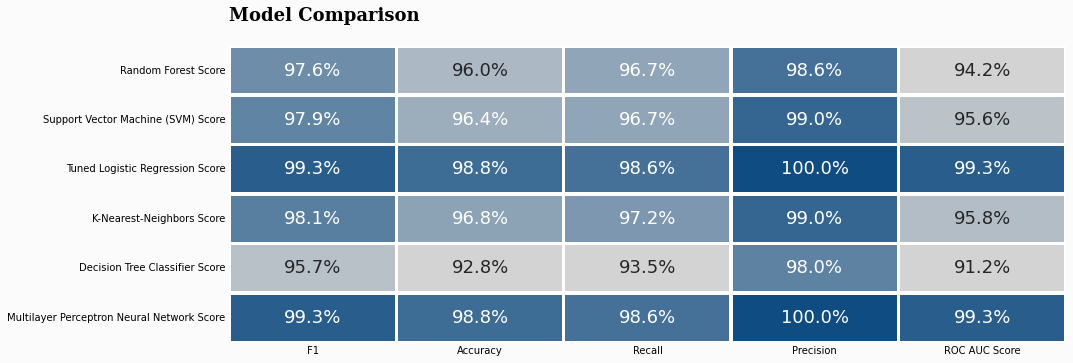

In [ ]:
df_models = round(pd.concat([rf_df,svm_df,lr_df,knn_df, dt_df, nn_df], axis=1),3)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(15,30)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0.90,vmax=1, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":18})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-0.5,'Model Comparison',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

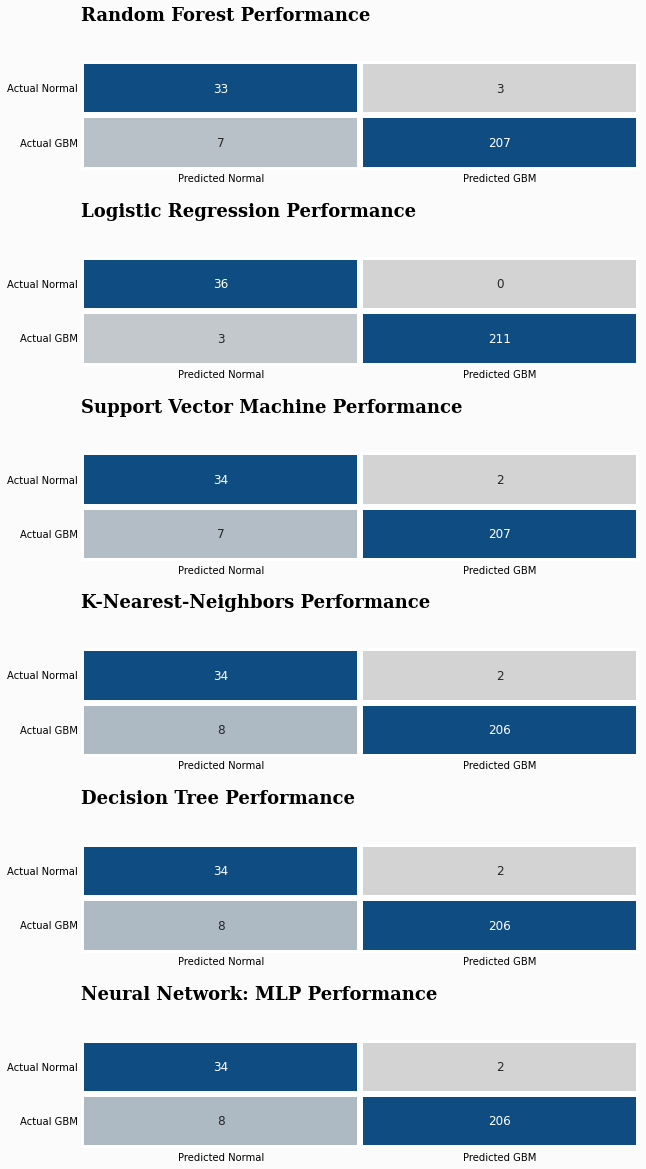

In [ ]:
# Plotting our results

colors = ["lightgray","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,20)) # create figure
gs = fig.add_gridspec(6, 2)
gs.update(wspace=0.1, hspace=0.8)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[2, :])
ax3 = fig.add_subplot(gs[3, :])
ax4 = fig.add_subplot(gs[4, :])
ax5 = fig.add_subplot(gs[5, :])
ax0.set_facecolor(background_color) # axes background color

# Overall
sns.heatmap(rf_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax0,
            yticklabels=['Actual Normal','Actual GBM'],xticklabels=['Predicted Normal','Predicted GBM'],annot_kws={"fontsize":12})

sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Actual Normal','Actual GBM'],xticklabels=['Predicted Normal','Predicted GBM'],annot_kws={"fontsize":12})

sns.heatmap(svm_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax2,
            yticklabels=['Actual Normal','Actual GBM'],xticklabels=['Predicted Normal','Predicted GBM'],annot_kws={"fontsize":12})

sns.heatmap(knn_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax3,
            yticklabels=['Actual Normal','Actual GBM'],xticklabels=['Predicted Normal','Predicted GBM'],annot_kws={"fontsize":12})

sns.heatmap(dt_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax4,
            yticklabels=['Actual Normal','Actual GBM'],xticklabels=['Predicted Normal','Predicted GBM'],annot_kws={"fontsize":12})

sns.heatmap(nn_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax5,
            yticklabels=['Actual Normal','Actual GBM'],xticklabels=['Predicted Normal','Predicted GBM'],annot_kws={"fontsize":12})

ax0.tick_params(axis=u'both', which=u'both',length=0)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax1.set_facecolor(background_color) 
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax2.set_facecolor(background_color)
ax3.tick_params(axis=u'both', which=u'both',length=0)
ax3.set_facecolor(background_color)
ax4.tick_params(axis=u'both', which=u'both',length=0)
ax4.set_facecolor(background_color)
ax5.tick_params(axis=u'both', which=u'both',length=0)
ax5.set_facecolor(background_color)

ax0.text(0,-0.75,'Random Forest Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax1.text(0,-0.75,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax2.text(0,-0.75,'Support Vector Machine Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax3.text(0,-0.75,'K-Nearest-Neighbors Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax4.text(0,-0.75,'Decision Tree Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax5.text(0,-0.75,'Neural Network: MLP Performance',fontsize=18,fontweight='bold',fontfamily='serif')

plt.show()

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'Feature':df.columns, 'Importance':m.feature_importances_}).sort_values('Importance', ascending=False)

fi = rf_feat_importance(rf_pipeline['RF'], X)
fi[:].style.background_gradient(cmap=colormap)

,Feature,Importance
522,CACNA2D1,0.022725
503,PAK1,0.022465
696,SAMD12,0.019839
666,nan,0.019688
684,nan,0.017655
107,LPL,0.017033
705,CELF4,0.016905
621,TENM2,0.016115
194,SYNGR3,0.015976
702,MPP7,0.015960


In [ ]:
fi[fi['Importance'] >= 0.02].to_csv('random-forest-genes.csv')

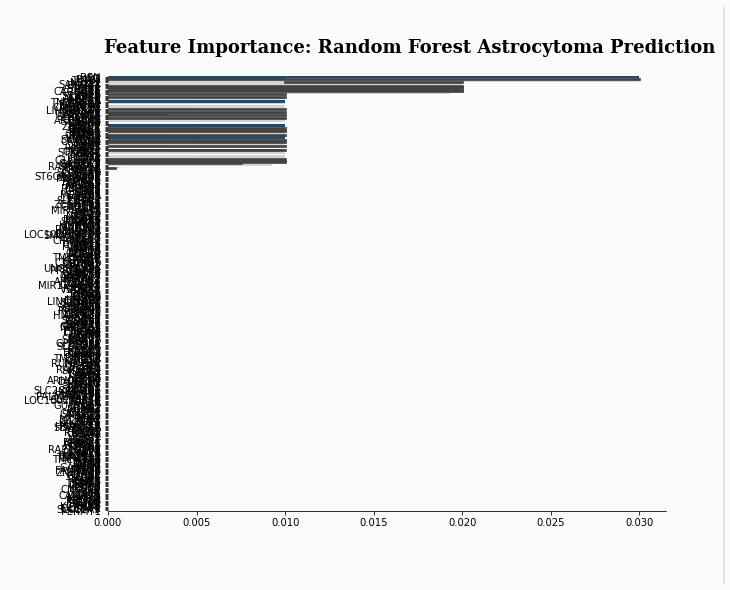

In [ ]:
background_color = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 8),facecolor=background_color)

color_map = ['lightgray' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#0f4c81' # color highlight

sns.barplot(data=fi,x='Importance',y='Feature',ax=ax,palette=color_map)
ax.set_facecolor(background_color) 
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
fig.text(0.12,0.92,"Feature Importance: Random Forest Astrocytoma Prediction", fontsize=18, fontweight='bold', fontfamily='serif')

    
plt.xlabel(" ", fontsize=12, fontweight='light', fontfamily='serif',y=-1.5)
plt.ylabel(" ", fontsize=12, fontweight='light', fontfamily='serif')


# fig.text(1.1, 0.92, 'Insight', fontsize=18, fontweight='bold', fontfamily='serif')

# fig.text(1.1, 0.315, '''
# Hmm.
# '''
#          , fontsize=14, fontweight='light', fontfamily='serif')

# ax.tick_params(axis=u'both', which=u'both',length=0)


import matplotlib.lines as lines
l1 = lines.Line2D([0.98, 0.98], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.4 MB/s eta 0:00:00


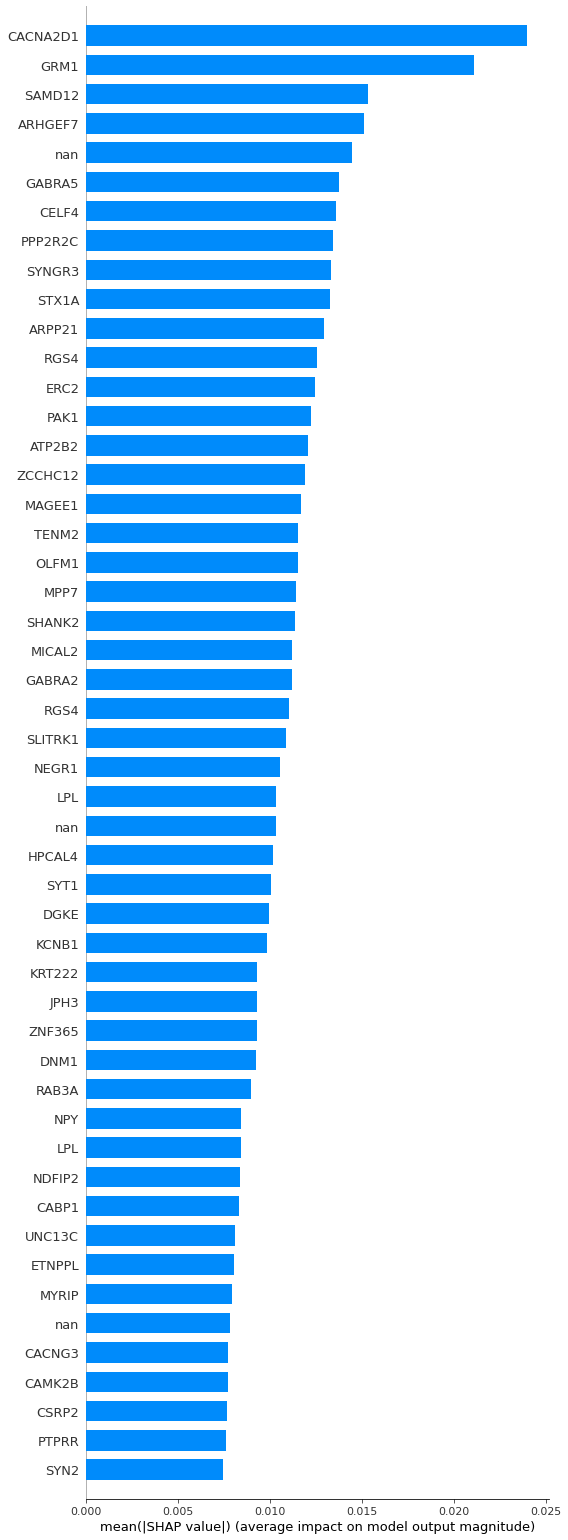

In [ ]:
import shap  

explainer = shap.TreeExplainer(rf_pipeline['RF'])

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_test)

# custom colour plot
colors = ["#9bb7d4", "#0f4c81"]           
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
shap.summary_plot(shap_values[1], X_test,cmap=cmap,alpha=0.4, plot_type="bar", max_display = 50)